In [30]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [73]:
def calculate_coeff(data, min_i, max_i, log=False, plot=False, show=True):
    data = np.array(data)
    data_clean = data[np.all(~np.isnan(data), axis=1)]
    data = np.sort(data, axis=0)
    d, ll = tuple(zip(*data_clean))

    d = d[min_i:max_i]
    ll = ll[min_i:max_i]

    d = np.array(d).reshape(-1,1)
    ll = np.array(ll)
    
    if log:
        d = np.log(d)

    regr = linear_model.LinearRegression()
    regr.fit(d, ll)
    ll_pred = regr.predict(d)

    if plot:
        plt.plot(d, regr.predict(d), label="prediction", c='r', alpha=0.5)
        plt.plot(d, ll, 'o-', alpha=0.5)
    if show:
        plt.show()
        
    return regr.coef_[0]

In [74]:
ds_name = "mnist"
img_size = 32
channels = 1
n_pixel = (img_size ** 2) * channels

indicies = range(50,190,10)


In [67]:
to_plot = []
f_names = glob(f"../losses/losses_train*dataset#{ds_name}*")
assert len(f_names) == 1, "You have to be more specific"
f = f_names[0]
txt = pd.read_csv(f, sep=",", header=None)

for i in indicies:
    loss, noise, _ = txt[txt.iloc[:, 2] == i].values[0]
    to_plot.append([noise, -loss])
    
print(to_plot)

[[0.02, -4.715580769472344], [0.0163792745495583, -4.456844477320828], [0.01341403173849042, -4.2000649995582044], [0.010985605433061173, -3.945781393383824], [0.008996812374061419, -3.694230736965357], [0.007368062997280772, -3.444565764970557], [0.006034176336545162, -3.1980015793512035], [0.0049417715448360575, -2.9537550862445388], [0.004047131644703234, -2.712790792210157], [0.003314454017339987, -2.475247444385706], [0.002714417616594907, -2.242119537120641], [0.002223009569218284, -2.0116844522398574], [0.0018205642030260805, -1.7855885945087255], [0.0014909760458230992, -1.565877074557681]]


In [75]:
to_plot = []
for i in indicies:
    f_names = glob(f"../ll/*dataset#{ds_name}*_{i}.txt")
    assert len(f_names) == 1, "You have to be more specific"
    f = f_names[0]
    txt = pd.read_csv(f, sep=" ", header=None)
    noise, pz, logdet = txt.mean()
    to_plot.append([noise, -(pz + logdet)])

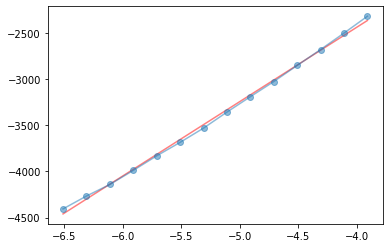

1830.7559567815638
0 2 109.45107252074581
1 3 132.88517908164636
2 4 161.23347664569894
3 5 149.85247796621377
4 6 203.84760847504197
5 7 189.69003588573082
6 8 154.32107585110464
7 9 253.09047511005053
8 10 292.41148472468376
9 11 234.70279808761427
10 12 261.1320061036114
11 13 396.32462321702474
12 14 327.30861962161714


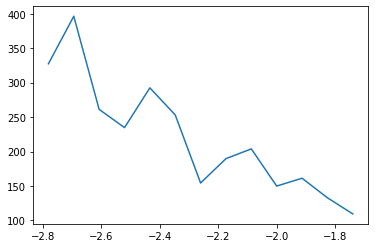

In [77]:
to_plot = np.array(to_plot)
coef = -calculate_coeff(to_plot, 0, len(to_plot), log=True, plot=True)
print(n_pixel - coef)
length = 2
dims = []
for i in range(0, len(to_plot)-length+1):
    coef = calculate_coeff(to_plot, i, i + length, log=True, plot=False)
    print(i, i + length, n_pixel - coef)
    dims.append(n_pixel - coef)
#     dims.append(coef)
plt.plot(np.log10((to_plot[:-1, 0] + to_plot[1:, 0])/2), dims)



In [29]:
to_plot = []
for f in sorted(glob("../ll/*dataset#point_2d*")):
    txt = pd.read_csv(f, sep=" ", header=None)
    noise, pz, logdet = txt.mean()
    to_plot.append([noise, pz + logdet])
#     print(noise)
    
print(to_plot)
to_plot = np.array(to_plot)
to_plot[:, 1] *= mul
coef = -calculate_coeff(to_plot, 0, len(to_plot), log=True, plot=True)
print(n_pixel - coef)
length = 2
dims = []
for i in range(0, len(to_plot)-length+1):
    coef = -calculate_coeff(to_plot, i, i + length, log=True, plot=False)
    print(i, i + length, n_pixel - coef)
    dims.append(n_pixel - coef)
plt.plot(np.log10((to_plot[:-1, 0] + to_plot[1:, 0])/2), dims)

[]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

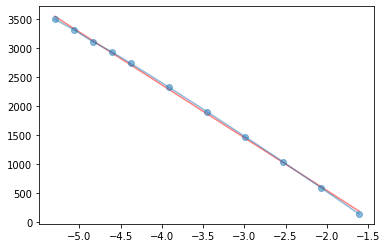

111.521148318408
0 2 251.42159448429493
1 3 117.78473188976807
2 4 258.4305566056606
3 5 160.31752375857843
4 6 133.32748065276553
5 7 110.79026299928614
6 8 88.572889129077
7 9 77.18390382805535
8 10 52.159152366686385
9 11 43.167876340500584


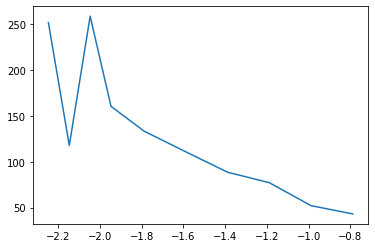

In [75]:
image_size = 32
n_pixel = image_size * image_size * 1
mul = np.log(2) * n_pixel

to_plot = []
for f in sorted(glob("../ll/*dataset#mnist*")):
    txt = pd.read_csv(f, sep=" ", header=None)
    noise, pz, logdet = txt.mean()
    to_plot.append([noise, pz + logdet])
#     print(noise)
    
to_plot = np.array(to_plot)
to_plot[:, 1] *= mul
coef = -calculate_coeff(to_plot, 0, len(to_plot), log=True, plot=True)
print(n_pixel - coef)
length = 2
dims = []
for i in range(0, len(to_plot)-length+1):
    coef = -calculate_coeff(to_plot, i, i + length, log=True, plot=False)
    print(i, i + length, n_pixel - coef)
    dims.append(n_pixel - coef)
plt.plot(np.log10((to_plot[:-1, 0] + to_plot[1:, 0])/2), dims)

0.005000000000000004
0.0062999999999999836
0.007929999999999994
0.009990000000000027
0.012569999999999987
0.019940000000000027
0.031620000000000065
0.050150000000000035
0.07953000000000009
0.1261200000000002
0.19999999999999962


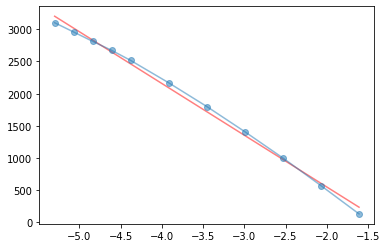

219.3277797424339
0 2 397.3868888959497
1 3 393.96758320180436
2 4 417.14284907028525
3 5 341.96363551188506
4 6 269.76994966431903
5 7 225.65243111596203
6 8 174.3474661591539
7 9 138.62056758421522
8 10 93.05690747099072
9 11 70.26847128024679


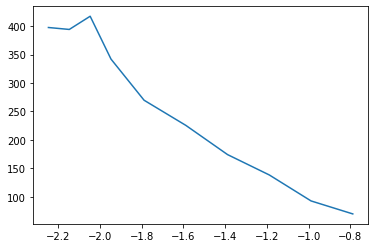

In [77]:
image_size = 32
n_pixel = image_size * image_size * 1
mul = np.log(2) * n_pixel

to_plot = []
for f in sorted(glob("../ll/*dataset#fashion_mnist*")):
#     print(f)
    txt = pd.read_csv(f, sep=" ", header=None)
    noise, pz, logdet = txt.mean()
    to_plot.append([noise, pz + logdet])
    print(noise)
    
to_plot = np.array(to_plot)
to_plot[:, 1] *= mul
coef = -calculate_coeff(to_plot, 0, len(to_plot), log=True, plot=True)
print(n_pixel - coef)
length = 2
dims = []
for i in range(0, len(to_plot)-length+1):
    coef = -calculate_coeff(to_plot, i, i + length, log=True, plot=False)
    print(i, i + length, n_pixel - coef)
    dims.append(n_pixel - coef)
plt.plot(np.log10((to_plot[:-1, 0] + to_plot[1:, 0])/2), dims)

In [30]:
32*32

1024

In [7]:
10**(-2.2)


0.00630957344480193